# Polynomial Regression

---

## Breif:
Polynomial Regression allows you to fit a model to **non-linear** data, using higher degree polynomials like squares and cubes to do so.
- [Extracting non-linear Data](#extracting-data)
- [Getting polunomial features](#getting-polynomial-features)
- [Cost function](#cost-function)
- [Gradient Descent](#gradient-descent)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extracting Data

- Simply extract the data with **pandas** and convert it into numpy ndarrays.  
- This data set is called **"Ice Cream Selling Data"** which shows the *number of units sold* per *temperature* of ice-cream.  
- Its a very simple **univariate dataset** and only has 49 training examples (This notebook is just a practice for using polynomials. For more in-depth regression, check out multivariate regression in the other folder)  

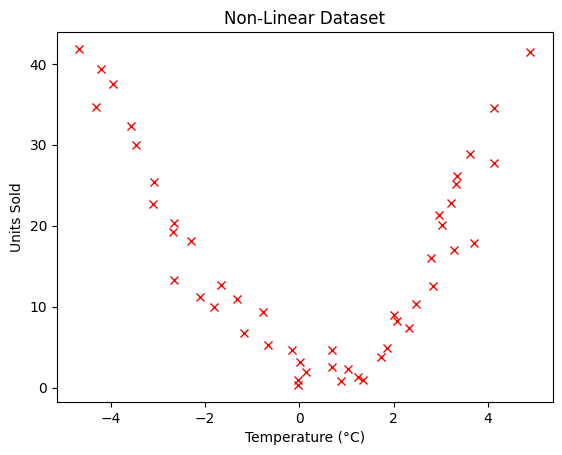

In [2]:
x_raw = pd.read_csv("icecream.csv", usecols=[0]).values
y = pd.read_csv("icecream.csv", usecols=[1]).values

# Visualize the data
plt.plot(x_raw, y, 'x', c='r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Units Sold")
plt.title("Non-Linear Dataset")

plt.show()

## Getting Polynomial Features

A **Polynomial Regression Model** is defined as:  
$$
f(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_d x^d
$$

Or, using summation notation:
$$
f(x) = \sum_{i=0}^{d} w_i x^i
$$

However, a very simple implementation can be done using ``np.vstack`` AKA: "Numpy Vertical Stack"  
Where it inputs multiple numpy ndarrays, and outputs them vertically stacked in a matrix

In our case:
- ``[x ** i for i in range(degree + 1)]`` Uses an inline loop to create multiple polynomial ${x}$ features before stacking them ontop of eachother vertically
- ``.T`` Means "Transpose" and it flips the rows and collumns giving us the training samples we need.


In [31]:
def get_polynomial_features(x, degree):
    return np.hstack([x**i for i in range(degree + 1)])

## Cost function

The cost function for polynomial regression will be the MSE (Mean Squared Error) cost using L2 regularization (also known as ridge regression) to prevent the ${w}$ parameter from getting unnessecarily big

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

Where:
- $f_{w,b}(x^{(i)})$ is the model output given input ${x}$ 
- $\frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$ is the penalty / regularization term
- ${m}$ and ${n}$ are the number of training examples

Notes:  
The larger the regularization term $\lambda$ is, the bigger the "penalty" on the ${w}$ parameter is. Meaning that, this will encourage the model to keep the parameter size small as the larger it is, the more it adds to the cost.

In [39]:
def cost(w, b, x, y):
    cost = np.mean(((x @ w + b) - y)**2) / 2
    lambda_ = 0.01 # Can be changed
    penalty = np.mean(w) * lambda_ / 2
    return cost + penalty

## Gradient Descent

- Gradient descent is calulated using this (very fancy and confusing looking mathematical formula):  


$$
w_j := w_j - \alpha \frac{\partial j(w,b)}{\partial w_j} + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

$$
b := b - \alpha \frac{\partial j(w,b)}{\partial b}
$$

- But really, in code terms, those confusing derivates are just as simple as this:  
$$
\frac{\partial j(w,b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}  + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

$$
\frac{\partial j(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$


See? its just the cost function with the L2 regularization (penalty term) we added before. But for the ${x}$ parameter we simply multiply the cost by ${x^i}$ And for ${b}$, its just the cost.  
That is how we *update the model's parameters* and successfully *train the model* to fit the data.

Notes:
- ${j(w,b)}$ is the cost function
- ${m}$ is the number of training examples
- ${\hat{y}}$ is the model's prediction f_wb of y
- ${y}$ is the target value y

In [94]:
def gradient_descent(w, b, x, y, alphar, itterations, cost_arr):
    for i in range(itterations):
        err = (x @ w + b) - y
        m = x.shape[0]
        lambda_ = 0.01
        grad_w = (x.T @ err) / m + (lambda_ * w) / m
        w -= alphar * grad_w
        b -= alphar * np.mean(err)

        ## for visualization purposes ##
        current_cost = cost(w, b, x, y)
        if i % 10 == 0: print(f"Itteration {i} || Cost = {current_cost}")
        cost_arr.append(current_cost)
        ## for visualization purposes ##
    return w, b, cost_arr

## Testing and Training

Now's the climax of this story!! We will run gradient descent, mapping the cost in respect to itterations of runnning gradient descent where we'll be doing the following:
- Get **polynomial features of x**
- Run **Gradient Descent** and plot the variation of cost
- Plot the line on the dataset

In [99]:
x = get_polynomial_features(x_raw, 2)
w = np.random.rand(3)
b = np.random.rand()
y = y.reshape(-1)
w, b, err_arr = gradient_descent(w, b, x, y, 0.01, 200, [])

Itteration 0 || Cost = 16.78338795410003
Itteration 10 || Cost = 8.16470230519442
Itteration 20 || Cost = 6.259002979947263
Itteration 30 || Cost = 5.74243084951112
Itteration 40 || Cost = 5.553986237157984
Itteration 50 || Cost = 5.4511551947747385
Itteration 60 || Cost = 5.377204749175648
Itteration 70 || Cost = 5.317780865486993
Itteration 80 || Cost = 5.268370899103017
Itteration 90 || Cost = 5.22689224417413
Itteration 100 || Cost = 5.191980690319798
Itteration 110 || Cost = 5.162575720179387
Itteration 120 || Cost = 5.137804131158133
Itteration 130 || Cost = 5.116934899435299
Itteration 140 || Cost = 5.099353199068288
Itteration 150 || Cost = 5.084541269524805
Itteration 160 || Cost = 5.072062933519013
Itteration 170 || Cost = 5.061550703043716
Itteration 180 || Cost = 5.052694952324246
Itteration 190 || Cost = 5.045234804924028


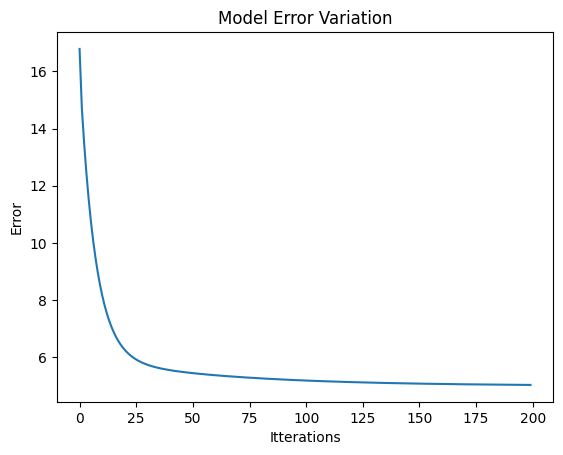

In [ ]:
# Error variation per itterations of gradient descent

plt.plot(range(200), err_arr)
plt.xlabel("Itterations")
plt.ylabel("Error")
plt.title("Model Error Variation")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

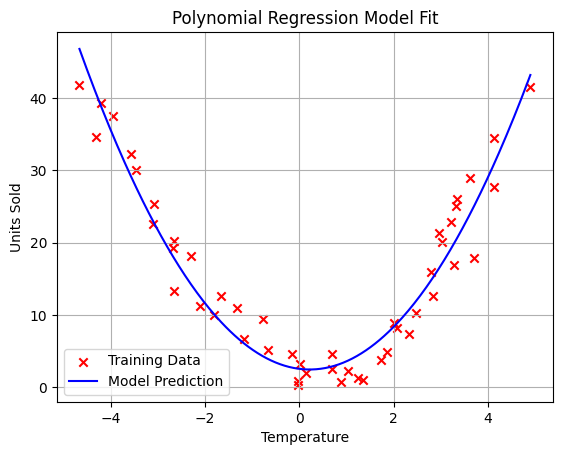

In [103]:
plt.scatter(x_raw, y, marker='x', color='r', label="Training Data")
x_line = np.linspace(x_raw.min(), x_raw.max(), 300).reshape(-1, 1)  # shape (300, 1)
x_line_poly = get_polynomial_features(x_line, degree=2)
y_line = x_line_poly @ w + b

plt.plot(x_line, y_line, color='b', label='Model Prediction')
plt.xlabel("Temperature")
plt.ylabel("Units Sold")
plt.title("Polynomial Regression Model Fit")
plt.legend()
plt.grid(True)
plt.show

## Ending

Thank you for reading this far into my nerdy little program, in this notebook we:
- Calculated Polynomial Features using ``get_polynomial_features()`` function
- Defined MSE Cost Function with **L2 Normalization** (penalty term) with ``cost()`` function
- Sucessfully made model error converge with ``gradient_descent()`` function

If you're interested in more models like these, do checkout univariate regression and multivariate regression (more to come!!)  
This was Polynomial Regression.

---

==> Written by Ziad Alezzi (lucirie)
- [Github](https://github.com/lucirie)
- [Linkedin](https://www.linkedin.com/in/ziad-alezzi-8727bb345/)